In [302]:
import ROOT
import ctypes


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [303]:
# sig_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_phi.root")
# signal_tree = sig_file.Get("phi")

sig_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_phi.root")
signal_tree = sig_file.Get("phi")

# sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_phi/standard.root")
# signal_1ab_tree = sig_1ab_file.Get("phi")


In [304]:
mychain = ROOT.TChain("phi")
file_list = ["/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_phi_*.root"]

for i in file_list:
    mychain.Add(i)

In [305]:
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.78,1.91)
D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.76,1.92)

# D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.72,1.92)


In [306]:
# def extract_histo(tree, histogram):
#     for event in tree:
#         histogram.Fill(event.D0_M)
#     return histogram

In [307]:
def apply_cuts(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.D0_M > 1.78 and event.D0_M < 1.91 and event.dM_pi0_75MeV > 0.023:
        if event.D0_M > 1.76 and event.D0_M < 1.92 and event.dM_pi0_75MeV > 0.023:

            histogram.Fill(event.D0_M)
    return histogram

In [308]:
# def extract_signals(tree, histogram):
#     for event in tree:
#         # if event.D0_M > 1.67 and event.D0_M < 2.06:
#         if event.nSigCascDcyBr_0==1 and event.D0_M > 1.72 and event.D0_M < 1.92 and event.Belle2Pi0Veto_75MeV > 0.022:
#         # if event.nSigCascDcyBr_0==1 and event.D0_M > 1.67 and event.D0_M < 2.06 and event.Belle2Pi0Veto_75MeV > 0.02:

#             histogram.Fill(event.D0_M)
#     return histogram

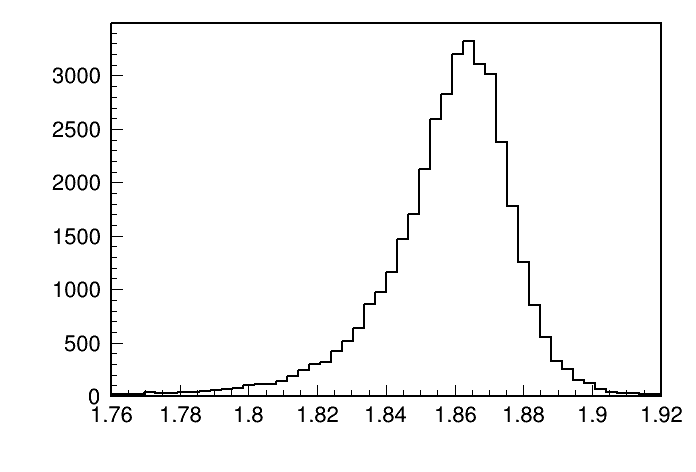

In [309]:

D0_M_TH1F = apply_cuts(signal_tree, D0_M_TH1F)
c1 = ROOT.TCanvas()
D0_M_TH1F.Draw()
c1.Draw()

In [272]:

# D0_M_TH1F_2 = extract_signals(signal_1ab_tree, D0_M_TH1F_2)
# # D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

# c1 = ROOT.TCanvas()
# D0_M_TH1F_2.Draw()
# c1.Draw()

In [273]:

# scale_factor = D0_M_TH1F_2.GetEntries()/D0_M_TH1F.GetEntries()

In [274]:
# scale_factor = 1

In [310]:
fitting_region = (1.78, 1.91)
fitting_region = (1.76, 1.92)

x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
y = ROOT.RooRealVar("dM_pi0_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")

# x.setBins(50)
l = ROOT.RooArgList(x)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, 1)

# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, 1)


In [311]:

mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.89)
mean2 = ROOT.RooRealVar("mean2", "mean of gaussians", 1.86,1.84, 1.89)

sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0.001,0.1)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0.001,0.1)
alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,10)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,20)
 
    
# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,30)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,50)    
    
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    

# mu = ROOT.RooRealVar("mu", "Novo peak", 1.83,1.67,1.93)    
# gamma = ROOT.RooRealVar("gamma", "Novo peak", -1,-5,0)    
# para_lambda =  ROOT.RooRealVar("para_lambda", "Novo peak", 1,-5,5)    
# delta = ROOT.RooRealVar("delta", "Novo peak", 1.83,0,3)    


In [312]:
# w = ROOT.RooRealVar('w', 'w', 0, 1)
# w = ROOT.RooRealVar('w', 'w', 0.5)



In [313]:
# w.Print()

In [322]:
# signalhist = ROOT.RooDataSet("sighist","", x, ROOT.RooFit.Import(mychain), Cut="Dstarp_isSignal==1 ")
# signalhist = ROOT.RooDataSet("sighist","", ROOT.RooArgSet(x,y), ROOT.RooFit.Import(mychain), Cut="D0_M>1.78 & D0_M<1.91 & dM_pi0_75MeV > 0.023 ")
signalhist = ROOT.RooDataSet("sighist","", ROOT.RooArgSet(x,y), ROOT.RooFit.Import(mychain), Cut="D0_M>1.76 & D0_M<1.92 & dM_pi0_75MeV > 0.023 ")

# signalhist = ROOT.RooDataSet("sighist","", ROOT.RooArgSet(x,y), ROOT.RooFit.Import(mychain), Cut="D0_M>1.78 & D0_M<1.91 & dM_pi0_75MeV > 0.023 ", WeightVar=ROOT.RooFit.WeightVar(w))

[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(sighist) Skipping event #6 because D0_M cannot accommodate the value 1.75612
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(sighist) Skipping event #13 because D0_M cannot accommodate the value 1.75045
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(sighist) Skipping event #42 because D0_M cannot accommodate the value 1.73
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(sighist) Skipping event #48 because D0_M cannot accommodate the value 1.73603
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(sighist) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(sighist) Ignored 459 out-of-range events


In [323]:
signalhist.Print()

RooDataSet::sighist[D0_M,dM_pi0_75MeV] = 37774 entries


In [324]:
# signalhist.addColumn(w)

In [325]:
# signalhist.Print()

In [326]:
signalhist.get()

In [327]:
# wdata = ROOT.RooDataSet(signalhist.GetName(), signalhist.GetTitle(),signalhist, signalhist.get(), '' ,  'w')

In [328]:
# wdata.Print()

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig1,sig2)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig1,sig2)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig1,sig2)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig1,sig2)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig1,sig2)
[#1] 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file phi_massveto_1ab_signal.png has been created


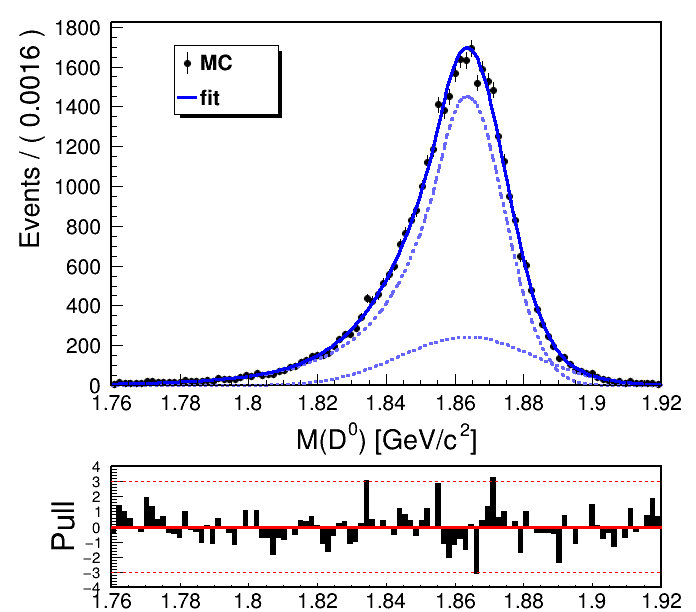

In [330]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
# sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)

# ROOT.RooFit.RooConst(0)
# sig1 = ROOT.RooJohnson("sig1", "Signal component 1", x,mu, para_lambda,gamma,delta)

sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)



# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)


# x.setBins(10000,"cache") 
# model = ROOT.RooFFTConvPdf("model","CB (X) gauss",x,sig2,sig1)

r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)
# r = model.fitTo(wdata,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

signalhist.plotOn(frame,Name = "data1", XErrorSize=0)
# wdata.plotOn(frame,Name = "data1", XErrorSize=0, DataError=ROOT.RooAbsData.SumW2)
# wdata.plotOn(frame,Name = "data1", XErrorSize=0,DataError=ROOT.RooAbsData.SumW2)

# 
model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.25, 0.75, 0.4, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
# canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/phigamma/phi_massveto_1ab_signal.png")
canv.SaveAs("phi_massveto_1ab_signal.png")

f = ROOT.TFile("phig_MC15ri_half1M_signalMC_fitresult.root", "RECREATE")
r.Write("phig")
f.Close()


In [299]:
model.Print("t")

0x55fb5d457380 RooAddPdf::model = 0.438346 [Auto,Dirty] 
  0x55fb5db9b670/V- RooGaussian::sig1 = 0.578247 [Auto,Dirty] 
    0x55fb51dfc9b0/V- RooRealVar::D0_M = 1.845
    0x55fb3eb42d40/V- RooRealVar::mean = 1.86382 +/- 0.000169987
    0x55fb190a4820/V- RooRealVar::sigma1 = 0.0179822 +/- 0.000729055
  0x55fb458ce1d0/V- RooRealVar::sig1frac = 0.242158 +/- 0.035583
  0x55fb5a9aa9a0/V- RooCBShape::sig2 = 0.393643 [Auto,Dirty] 
    0x55fb51dfc9b0/V- RooRealVar::D0_M = 1.845
    0x55fb3eb42d40/V- RooRealVar::mean = 1.86382 +/- 0.000169987
    0x55fb0bbabb50/V- RooRealVar::sigma2 = 0.0104622 +/- 0.000306294
    0x55fb17c3ed40/V- RooRealVar::alpha = 0.639286 +/- 0.0344598
    0x55fafdbd3ba0/V- RooRealVar::n_CB = 19.9999 +/- 12.3434


In [300]:
f = ROOT.TFile.Open("phig_signalMC_fitresult.root")
r2 = ROOT.gDirectory.Get("phig")
f.Close()


In [143]:
r2.Print()


  RooFitResult: minimized FCN value: -102515, estimated distance to minimum: 0.000238751
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                 alpha    6.9549e-01 +/-  2.43e-02
                  mean    1.8636e+00 +/-  1.16e-04
                  n_CB    1.3860e+01 +/-  3.49e+00
              sig1frac    2.8199e-01 +/-  2.84e-02
                sigma1    1.7493e-02 +/-  4.67e-04
                sigma2    1.0590e-02 +/-  1.75e-04



In [144]:
r2.correlation("alpha","n_CB")

-0.5390424609830794

In [145]:
r2.edm()

0.0002387513191261711

In [146]:
r2.correlationMatrix()

<cppyy.gbl.TMatrixTSym<double> object at 0x55f5e19d41d0>

In [150]:
r2.printValue('alpha')

TypeError: void RooFitResult::printValue(basic_ostream<char,char_traits<char> >& os) =>
    TypeError: could not convert argument 1

In [152]:
# RooArgSet fitargs = res->floatParsFinal();



In [159]:
print(fit_args.at(0))

RooRealVar::alpha = 0.695492 +/- 0.0243261  L(0 - 10) 



In [160]:
alpha1 = fit_args.at(0)

In [163]:
alpha1.getVal()

0.6954922960434734

In [164]:
alpha1.getError()

0.024326052531200293

In [35]:
# sig_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_phi.root")
# signal_tree = sig_file.Get("phi")

sig_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_phi.root")
signal_tree = sig_file.Get("phi")
# sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_phi/standard.root")
# signal_1ab_tree = sig_1ab_file.Get("phi")


In [36]:
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
TH1F = ROOT.TH1F("D0_cosHel_0_TH1F","D0 mass",50,-1,1)
# D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.72,1.92)


In [37]:
# def extract_histo(tree, histogram):
#     for event in tree:
#         histogram.Fill(event.D0_M)
#     return histogram

In [38]:
def apply_cuts(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        if event.D0_M > 1.78 and event.D0_M < 1.91 and event.dM_pi0_75MeV > 0.023:

            histogram.Fill(event.D0_cosHel_0)
    return histogram

In [39]:
# def extract_signals(tree, histogram):
#     for event in tree:
#         # if event.D0_M > 1.67 and event.D0_M < 2.06:
#         if event.nSigCascDcyBr_0==1 and event.D0_M > 1.72 and event.D0_M < 1.92 and event.Belle2Pi0Veto_75MeV > 0.022:
#         # if event.nSigCascDcyBr_0==1 and event.D0_M > 1.67 and event.D0_M < 2.06 and event.Belle2Pi0Veto_75MeV > 0.02:

#             histogram.Fill(event.D0_M)
#     return histogram

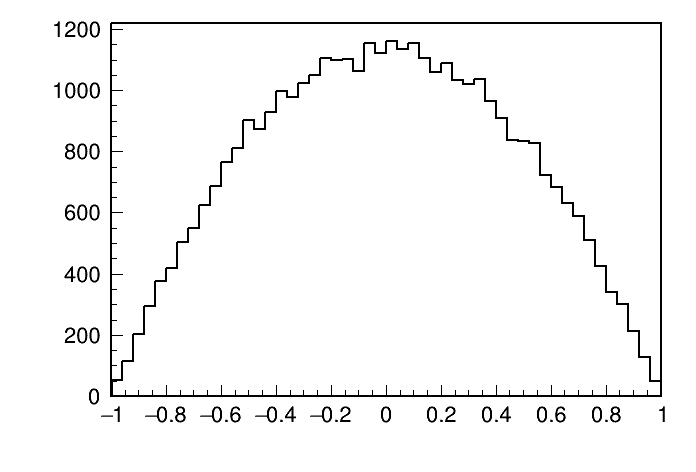

In [40]:

TH1F = apply_cuts(signal_tree, TH1F)
c1 = ROOT.TCanvas()
TH1F.Draw()
c1.Draw()

In [226]:

# scale_factor = D0_M_TH1F_2.GetEntries()/D0_M_TH1F.GetEntries()

In [227]:
# scale_factor = 1

In [41]:
ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

94488127211344

(MyPdf_xsquared_nopara) An instance of MyPdf_xsquared_nopara.


Info in <TUnixSystem::ACLiC>: creating shared library /home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/1D_1ab_sigbkg/./MyPdf_xsquared_nopara_cxx.so


In [42]:
ROOT.RooClassFactory.makePdf("MyPdf_one_minus_squared_para", "x,c0", "", "c0*(1-x*x)")
ROOT.gROOT.ProcessLineSync(".x MyPdf_one_minus_squared_para.cxx+")

94488129387248

(MyPdf_one_minus_squared_para) An instance of MyPdf_one_minus_squared_para.


Info in <TUnixSystem::ACLiC>: creating shared library /home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/1D_1ab_sigbkg/./MyPdf_one_minus_squared_para_cxx.so


In [46]:
fitting_region = (-1,1)
x = ROOT.RooRealVar("M(D^{0})", "cos#theta_{H}", fitting_region[0], fitting_region[1], "")
# x.setBins(50)
l = ROOT.RooArgList(x)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, 1)

signalhist = ROOT.RooDataHist("sighist", "sighist", l, TH1F, 1)


In [47]:
c0 = ROOT.RooRealVar("c0", "c0",0.5, -1,1)
model = ROOT.MyPdf_one_minus_squared_para("model", "pdf", x, c0)


[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [-1,1]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [-1,1]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_model_sighist' created with bounds [-1,1]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[M(D^{0})]) using numeric integrator RooIntegrator1D to calculate Int(M(D^{0}))
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[M(D^{

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file phi_massveto_1ab_signal_helicity.png has been created


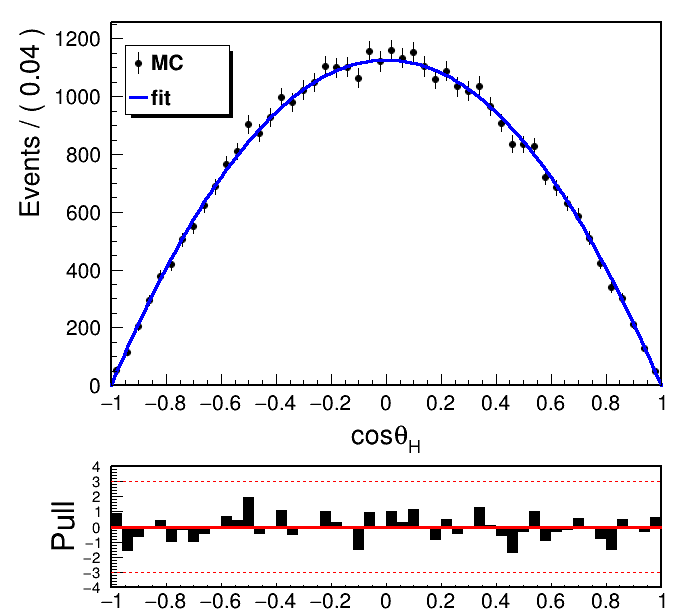

In [48]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# sig1 = ROOT.RooJohnson("sig1", "Signal component 1", x,mu, para_lambda,gamma,delta)

sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)



# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

# model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)


r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

signalhist.plotOn(frame,Name = "data1", XErrorSize=0)
# 
# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# # sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.18, 0.75, 0.33, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
#canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/phigamma/phi_massveto_1ab_signal.png")
canv.SaveAs("phi_massveto_1ab_signal_helicity.png")

# f = ROOT.TFile("phig_MC15ri_half1M_signalMC_fitresult.root", "RECREATE")
# r.Write("phig")
# f.Close()
